# Example of a cholesteric liquid crystal

Author: O. Castany, C. Molinaro, M. Müller

In [2]:
import elli
import elli.plot.structure as elliplot
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c, pi

## Set parameters

In [3]:
# Materials
glass = elli.IsotropicMaterial(elli.ConstantRefractiveIndex(1.55))
front = back = glass

# Liquid crystal oriented along the x direction
(no, ne) = (1.5, 1.7)
Dn = ne - no
n_med = (ne + no) / 2
LC = elli.UniaxialMaterial(
    elli.ConstantRefractiveIndex(no), elli.ConstantRefractiveIndex(ne)
)  # ne along z
R = elli.rotation_v_theta(elli.e_y, 90)  # rotation of pi/2 along y
LC.set_rotation(R)  # apply rotation from z to x
# Cholesteric pitch (nm):
p = 650
# One half turn of a right-handed helix:
TN = elli.TwistedLayer(LC, p / 2, angle=180, div=35)

# Inhomogeneous layer, repeated layer, and structure
N = 15  # number half pitch repetitions
h = N * p / 2
L = elli.RepeatedLayers([TN], N)
s = elli.Structure(front, [L], back)

# Calculation parameters
lbda_min, lbda_max = 800, 1200  # (nm)
lbda_B = p * n_med
lbda_list = np.linspace(lbda_min, lbda_max, 100)
k0_list = 2 * pi / lbda_list

## Analytical calculation for the maximal reflection

In [4]:
R_th = np.tanh(Dn / n_med * pi * h / p) ** 2
lbda_B1, lbda_B2 = p * no, p * ne

## Calculation with Berreman4x4

In [5]:
data = s.evaluate(lbda_list, 0)

T_pp = data.T_pp
T_ps = data.T_ps
T_ss = data.T_ss
T_sp = data.T_sp

# Transmission coefficients for incident unpolarized light:
T_pn = 0.5 * (T_pp + T_ps)
T_sn = 0.5 * (T_sp + T_ss)
T_nn = T_sn + T_pn

# Transmission coefficients for 's' and 'p' polarized light, with
# unpolarized measurement.
T_ns = T_ps + T_ss
T_np = T_pp + T_sp

# Right-circular wave is reflected in the stop-band.
# R_LR, T_LR close to zero.
R_RR = data.Rc_RR
R_LR = data.Rc_LR
T_RR = data.Tc_RR
T_LR = data.Tc_LR

# Left-circular wave is transmitted in the full spectrum.
# T_RL, R_RL, R_LL close to zero, T_LL close to 1.
T_LL = data.Tc_LL
R_LL = data.Rc_LL

## Text output: 
eigenvalues and eigenvectors of the transmission matrix for
a wavelength in the middle of the stop-band.

In [6]:
i = np.argmin(np.abs(lbda_list - lbda_B))  #  index for stop-band center
T = data.jones_matrix_t[i]  #  transmission matrix
eigenvalues, eigenvectors = np.linalg.eig(T)
np.set_printoptions(precision=3)
print("\nTransmission in the middle of the stop-band...\n")
print("Eigenvalues of the Jones transmission matrix:")
print(eigenvalues)
print("Corresponding power transmission:")
print(np.abs(eigenvalues) ** 2)
print("Corresponding eigenvectors:")
print(eigenvectors)
# Note: the transformation matrix to the eigenvector basis is
# B = numpy.matrix(eigenvectors), and the matrix B⁻¹ T B is diagonal.
print("Normalization to the 'p' componant:")
print(eigenvectors / eigenvectors[0, :])
print("Ratio 's'/'p':")
print(np.abs(eigenvectors[1, :] / eigenvectors[0, :]))
print("Complex angle (°) (+90°: L, -90°: R)")
print(180 / pi * np.angle(eigenvectors[1, :] / eigenvectors[0, :]))
# We observe that the eigenvectors are nearly perfectly polarized circular waves


Transmission in the middle of the stop-band...

Eigenvalues of the Jones transmission matrix:
[-0.977-0.21j  -0.105-0.002j]
Corresponding power transmission:
[0.999 0.011]
Corresponding eigenvectors:
[[0.729+0.j    0.026+0.684j]
 [0.026+0.684j 0.729+0.j   ]]
Normalization to the 'p' componant:
[[1.   +0.j    1.   +0.j   ]
 [0.035+0.939j 0.04 -1.064j]]
Ratio 's'/'p':
[0.939 1.064]
Complex angle (°) (+90°: L, -90°: R)
[ 87.858 -87.858]


## Plotting

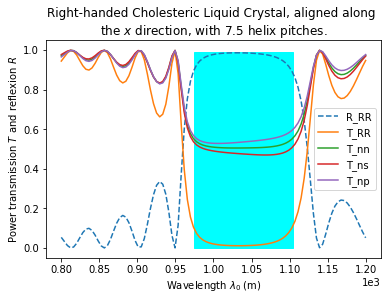

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Draw rectangle for λ ∈ [p·no, p·ne], and T ∈ [0, R_th]
rectangle = plt.Rectangle((lbda_B1, 0), lbda_B2 - lbda_B1, R_th, color="cyan")
ax.add_patch(rectangle)

ax.plot(lbda_list, R_RR, "--", label="R_RR")
ax.plot(lbda_list, T_RR, label="T_RR")
ax.plot(lbda_list, T_nn, label="T_nn")
ax.plot(lbda_list, T_ns, label="T_ns")
ax.plot(lbda_list, T_np, label="T_np")

ax.legend(loc="center right", bbox_to_anchor=(1.00, 0.50))

ax.set_title(
    "Right-handed Cholesteric Liquid Crystal, aligned along \n"
    + "the $x$ direction, with {:.1f} helix pitches.".format(N / 2.0)
)
ax.set_xlabel(r"Wavelength $\lambda_0$ (m)")
ax.set_ylabel(r"Power transmission $T$ and reflexion $R$")
fmt = ax.xaxis.get_major_formatter()
fmt.set_powerlimits((-3, 3))
plt.show()

<AxesSubplot:xlabel='z (nm)', ylabel="n'">

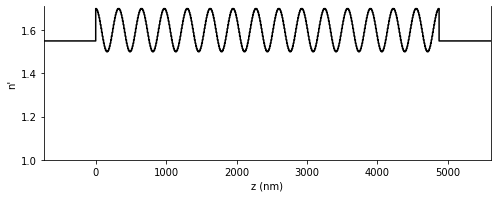

In [8]:
elliplot.draw_structure(s)